In [57]:
# default_exp recognition_results

In [50]:
from fastai import *
from fastai.vision import *
from pathlib import Path
import cv2

# 50 Black from VGG2

In [51]:
path = Path('../data/recognition/black_people/')
images = []
for i, human_dir in enumerate(path.iterdir()):
    for im_path in human_dir.iterdir():
        images.append( (str(im_path), i) )
black_df = pd.DataFrame(images, columns=('im_path', 'id'))
black_df

,im_path,id
0,../data/recognition/black_people/n007714/0260_...,0
1,../data/recognition/black_people/n007714/0203_...,0
2,../data/recognition/black_people/n007714/0009_...,0
3,../data/recognition/black_people/n007714/0182_...,0
4,../data/recognition/black_people/n007714/0136_...,0
...,...,...
16218,../data/recognition/black_people/n003568/0117_...,49
16219,../data/recognition/black_people/n003568/0028_...,49
16220,../data/recognition/black_people/n003568/0050_...,49
16221,../data/recognition/black_people/n003568/0036_...,49


In [52]:
num_ppl = black_df['id'].max() + 1

In [53]:
df = black_df
test_images = []
num_false_person, num_true_person = 3, 3
for i in progress_bar(range(num_ppl)):
    original_im_path = random.choice( list(df[df['id'] == i]['im_path']) )
    for j in range(num_false_person):
        false_im_path = random.choice( list(df[df['id'] != i]['im_path']) )
        test_images.append( (original_im_path, false_im_path, False) )
    for j in range(num_true_person):
        true_im_path = random.choice( list(df[df['id'] == i]['im_path']) )
        test_images.append( (original_im_path, true_im_path, True) )
test_df = pd.DataFrame(test_images, columns=('imA', 'imB', 'is_same'))
test_df

,imA,imB,is_same
0,../data/recognition/black_people/n007714/0100_...,../data/recognition/black_people/n003529/0392_...,False
1,../data/recognition/black_people/n007714/0100_...,../data/recognition/black_people/n002742/0177_...,False
2,../data/recognition/black_people/n007714/0100_...,../data/recognition/black_people/n000171/0174_...,False
3,../data/recognition/black_people/n007714/0100_...,../data/recognition/black_people/n007714/0392_...,True
4,../data/recognition/black_people/n007714/0100_...,../data/recognition/black_people/n007714/0254_...,True
...,...,...,...
295,../data/recognition/black_people/n003568/0354_...,../data/recognition/black_people/n002179/0192_...,False
296,../data/recognition/black_people/n003568/0354_...,../data/recognition/black_people/n004966/0116_...,False
297,../data/recognition/black_people/n003568/0354_...,../data/recognition/black_people/n003568/0405_...,True
298,../data/recognition/black_people/n003568/0354_...,../data/recognition/black_people/n003568/0088_...,True


# Ivory Coast 1k matches

In [54]:
path = Path('/data/faces/IC_1K_MATCHES/')

In [55]:
ids = set()
for im_path in path.iterdir():
    fn = str(im_path).split('/')[-1]
    name, suffix = fn.split('.')
    assert suffix == 'jpg'
    ids.add( name[:-3] )
ids = list(ids)
len(ids)

1113

In [56]:
for _id in ids:
    assert (path/(_id + 'Old.jpg')).exists()
    assert (path/(_id + 'New.jpg')).exists()

In [57]:
num_bad_examples = 1
test_images = []
for _id in ids: #[:len(ids)//2]:
    imA, imB = _id + 'Old.jpg', _id + 'New.jpg'
    imA, imB = map(lambda x: path/x, [imA, imB])
    test_images.append( (str(imA), str(imB), True) )
    false_ids = set(ids) - {_id}
    for i in range(num_bad_examples):
        bad_id = random.choice(list(false_ids))
        imA_tag, imB_tag = map(lambda _: random.choice(['Old','New']), range(2))
        imA, imB = _id + imA_tag + '.jpg', bad_id + imB_tag + '.jpg'
        imA, imB = map(lambda x: path/x, [imA, imB])
        test_images.append( (str(imA), str(imB), False) )
ic_test_df = pd.DataFrame(test_images, columns=('imA', 'imB', 'is_same'))
ic_test_df

,imA,imB,is_same
0,/data/faces/IC_1K_MATCHES/433339Old.jpg,/data/faces/IC_1K_MATCHES/433339New.jpg,True
1,/data/faces/IC_1K_MATCHES/433339Old.jpg,/data/faces/IC_1K_MATCHES/1042691New.jpg,False
2,/data/faces/IC_1K_MATCHES/5645712Old.jpg,/data/faces/IC_1K_MATCHES/5645712New.jpg,True
3,/data/faces/IC_1K_MATCHES/5645712New.jpg,/data/faces/IC_1K_MATCHES/6186239Old.jpg,False
4,/data/faces/IC_1K_MATCHES/324758Old.jpg,/data/faces/IC_1K_MATCHES/324758New.jpg,True
...,...,...,...
2221,/data/faces/IC_1K_MATCHES/3012707New.jpg,/data/faces/IC_1K_MATCHES/740812New.jpg,False
2222,/data/faces/IC_1K_MATCHES/656186Old.jpg,/data/faces/IC_1K_MATCHES/656186New.jpg,True
2223,/data/faces/IC_1K_MATCHES/656186New.jpg,/data/faces/IC_1K_MATCHES/1157378Old.jpg,False
2224,/data/faces/IC_1K_MATCHES/962111Old.jpg,/data/faces/IC_1K_MATCHES/962111New.jpg,True


# NT Ivory 1k good 1k bad matches

In [58]:
txt_path = Path('../data/icao_nt.txt')
test_nr_images = []
for line in open(txt_path).readlines():
    imA,imB,status,result = line.split(',')
    idA, idB = imA.split('.')[-2][:-3], imB.split('.')[-2][:-3]
    test_nr_images.append( (str(path/imA), str(path/imB), idA==idB, int(result)/100) )
nt_test_df = pd.DataFrame(test_nr_images, columns=('imA', 'imB', 'is_same', 'nt_result'))
nt_test_df

,imA,imB,is_same,nt_result
0,/data/faces/IC_1K_MATCHES/1004752Old.jpg,/data/faces/IC_1K_MATCHES/1004752New.jpg,True,0.97
1,/data/faces/IC_1K_MATCHES/1004752Old.jpg,/data/faces/IC_1K_MATCHES/962111New.jpg,False,0.08
2,/data/faces/IC_1K_MATCHES/1008815Old.jpg,/data/faces/IC_1K_MATCHES/2276831Old.jpg,False,0.26
3,/data/faces/IC_1K_MATCHES/1012316Old.jpg,/data/faces/IC_1K_MATCHES/1012316New.jpg,True,0.87
4,/data/faces/IC_1K_MATCHES/1012316Old.jpg,/data/faces/IC_1K_MATCHES/1157377New.jpg,False,0.00
...,...,...,...,...
2131,/data/faces/IC_1K_MATCHES/998491Old.jpg,/data/faces/IC_1K_MATCHES/1802903Old.jpg,False,0.16
2132,/data/faces/IC_1K_MATCHES/999394Old.jpg,/data/faces/IC_1K_MATCHES/999394New.jpg,True,0.85
2133,/data/faces/IC_1K_MATCHES/999394Old.jpg,/data/faces/IC_1K_MATCHES/1414774Old.jpg,False,0.14
2134,/data/faces/IC_1K_MATCHES/999800Old.jpg,/data/faces/IC_1K_MATCHES/999800New.jpg,True,0.86


# DLIB (default)

In [59]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    if gamma == 1: return image
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

In [60]:
import face_recognition
def calc_distance(imA_path, imB_path, tolerance=0.6, model="large", num_jitters=1, bbox_model="hog", gamma=1.0):
    known_image = adjust_gamma( face_recognition.load_image_file(imA_path), gamma)
    unknown_image = adjust_gamma( face_recognition.load_image_file(imB_path), gamma)
    kbbox = face_recognition.face_locations(known_image, model=bbox_model)
    ubbox = face_recognition.face_locations(unknown_image, model=bbox_model)
    biden_encoding = face_recognition.face_encodings(known_image, kbbox, model=model, num_jitters=num_jitters)[0]
    unknown_encoding = face_recognition.face_encodings(unknown_image, ubbox, model=model, num_jitters=num_jitters)[0]
    return face_recognition.face_distance([biden_encoding], unknown_encoding)[0]

def is_same_face(imA_path, imB_path, tolerance=0.6, **kwargs):
    dist = calc_distance(imA_path, imB_path, **kwargs)
    return dist <= tolerance

In [61]:
thresholds = range(45,80,5)

In [62]:
def test_algo(df=test_df, is_same_face_func=is_same_face, thresholds=thresholds):
    res = []
    for t in thresholds:
        t = t/100
        correct_results, errors = [], 0
        for a,b,is_same_true in progress_bar(list(zip(df['imA'], df['imB'], df['is_same']))):
            try:
                is_same_pred = is_same_face_func(a, b, tolerance=t)
                correct_results.append( (is_same_pred, is_same_true, a, b) )
            except:
                errors += 1
                correct_results.append( ('unk', is_same_true, a, b) )
        res.append(correct_results)
        print(t, 'errors:', errors)
    return res

In [63]:
def test_algo_dist(df=test_df, calc_distance_func=calc_distance, thresholds=thresholds):
    distances, errors = [], 0
    for a,b,is_same_true in progress_bar(list(zip(df['imA'], df['imB'], df['is_same']))):
        try:
            dist = calc_distance_func(a, b)
            distances.append( (dist, is_same_true, a, b) )
        except:
            errors += 1
            distances.append( ('unk', is_same_true, a, b) )
    print('errors:', errors)
    res = []
    for t in thresholds:
        t = t/100
        correct_results = []
        for dist, is_same_true, a, b in distances:
            is_same_pred = dist <= t if dist != 'unk' else 'unk'
            correct_results.append( (is_same_pred, is_same_true, a, b) )
        res.append(correct_results)
    return res

In [64]:
def get_algo_dist(df, calc_distance_func):
    distances, errors = [], 0
    for a,b,is_same_true in progress_bar(list(zip(df['imA'], df['imB'], df['is_same']))):
        try:
            dist = calc_distance_func(a, b)
            distances.append( (dist, is_same_true, a, b) )
        except:
            errors += 1
            distances.append( ('unk', is_same_true, a, b) )
    print('errors:', errors)
    return distances

In [65]:
def print_results(res, thresholds, verbose=1):
    out = {}
    for r,t in zip(res, thresholds):
        t = t/100
        r = list(filter(lambda x: x[0] != 'unk', r))
        correct_results = [pred == true for pred, true, *args in r]
        precision = [pred == true for pred, true, *args in r if pred == True]
        recall = [pred == true for pred, true, *args in r if true == True]
        acc, precision, recall = np.mean(correct_results), np.mean(precision), np.mean(recall)
        out[t] = acc, precision, recall
        if verbose != 0: print(t, list(map(lambda x:int(x*100)/100, [acc, precision, recall])))
    return out

In [66]:
def parse_pres(pres):
    x = list(pres.keys())
    accs = [acc for acc,prec,recall in pres.values()]
    precs = [prec for acc,prec,recall in pres.values()]
    recalls = [recall for acc,prec,recall in pres.values()]
    return x, accs, precs, recalls

In [67]:
def lineplot(x, ys, names=['acc','prec','recall'], mark='-'):
    for y, name in zip(ys, names):
        line, = plt.plot(x, y, mark)
        line.set_label(name)
    plt.legend()

In [94]:
%matplotlib notebook

# NT vs DLIB

In [81]:
distances = get_algo_dist(nt_test_df, calc_distance_func=calc_distance)

errors: 40


In [85]:
dists = [x[0] for x in distances]
# dists

In [86]:
def create_dist_generator(distances=nt_test_df['nt_result']):
    results = iter(distances)
    def get_item_func(*args, **kwargs):
        return next(results)
    return get_item_func

In [87]:
def test_algo_dist(df=test_df, calc_distance_func=calc_distance, thresholds=thresholds):
    distances, errors = [], 0
    for a,b,is_same_true in progress_bar(list(zip(df['imA'], df['imB'], df['is_same']))):
        try:
            dist = calc_distance_func(a, b)
            distances.append( (dist, is_same_true, a, b) )
        except:
            errors += 1
            distances.append( ('unk', is_same_true, a, b) )
    print('errors:', errors)
    res = []
    for t in thresholds:
        t = t/100
        correct_results = []
        for dist, is_same_true, a, b in distances:
            is_same_pred = dist <= t if dist != 'unk' else 'unk'
            correct_results.append( (is_same_pred, is_same_true, a, b) )
        res.append(correct_results)
    return res

In [88]:
# precalculated_distances = create_dist_generator(dists)
# res = test_algo_dist(df=nt_test_df, calc_distance_func=precalculated_distances, thresholds=thresholds)

In [89]:
# precalculated_distances = create_dist_generator(nt_test_df['nt_result'])
# res2 = test_algo_dist(df=nt_test_df, calc_distance_func=precalculated_distances, thresholds=thresholds)

In [90]:
thresholds = range(0,100,5)
precalculated_distances = create_dist_generator(dists)
res = test_algo_dist(df=nt_test_df, calc_distance_func=precalculated_distances, thresholds=thresholds)
pres_dlib = print_results(res, thresholds, verbose=0)

errors: 0


In [91]:
nt_test_df['nt_result']

0       0.97
1       0.08
2       0.26
3       0.87
4       0.00
        ... 
2131    0.16
2132    0.85
2133    0.14
2134    0.86
2135    0.08
Name: nt_result, Length: 2136, dtype: float64

In [237]:
precalculated_distances = create_dist_generator([1-i for i in nt_test_df['nt_result']])
res2 = test_algo_dist(df=nt_test_df, calc_distance_func=precalculated_distances, thresholds=thresholds)
pres_nt = print_results(res2, thresholds, verbose=0)

errors: 0


In [238]:
plt.show()

In [239]:
for p, name in zip([pres_dlib,pres_nt],['dlib','nt']):
    x, *ys = parse_pres(p)
    lineplot(x, ys, map(lambda x: x+'_'+name, ['acc','prec','recall']))

In [ ]:
df = nt_test_df
distances, errors = [], 0
for a,b,is_same_true,result in zip(df['imA'], df['imB'], df['is_same'], df['nt_result']):
    distances.append( (1-result, is_same_true, a, b) )
print('errors:', errors)
res = []
for t in thresholds:
    t = t/100
    correct_results = []
    for dist, is_same_true, a, b in distances:
        is_same_pred = dist <= t if dist != 'unk' else 'unk'
        correct_results.append( (is_same_pred, is_same_true, a, b) )
    res.append(correct_results)

def test_algo_dist(df=test_df, calc_distance_func=calc_distance, thresholds=thresholds):
    distances, errors = [], 0
    for a,b,is_same_true in progress_bar(list(zip(df['imA'], df['imB'], df['is_same']))):
        try:
            dist = calc_distance_func(a, b)
            distances.append( (dist, is_same_true, a, b) )
        except:
            errors += 1
            distances.append( ('unk', is_same_true, a, b) )
    print('errors:', errors)
    res = []
    for t in thresholds:
        t = t/100
        correct_results = []
        for dist, is_same_true, a, b in distances:
            is_same_pred = dist <= t if dist != 'unk' else 'unk'
            correct_results.append( (is_same_pred, is_same_true, a, b) )
        res.append(correct_results)
    return res

In [ ]:
thresholds = range(0,100,5)
res = test_algo_dist(df=ic_test_df, calc_distance_func=partial(calc_distance, num_jitters=3), thresholds=thresholds)
pres = print_results(res, thresholds, verbose=0)
x, *ys = parse_pres(pres)
lineplot(x, ys, map(lambda x: x+'_'+name, ['acc','prec','recall']))

# Other plots

errors: 94


/home/dominykas/anaconda3/envs/nlp/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/dominykas/anaconda3/envs/nlp/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


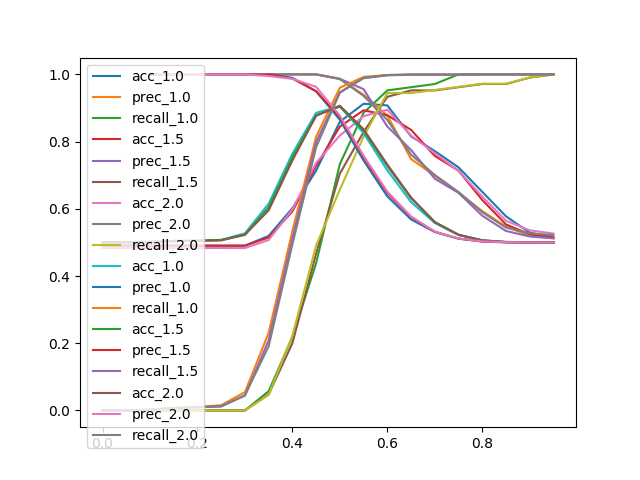

errors: 94


errors: 91


In [39]:
thresholds = range(0,100,5)
presses = []
for name, calc_distance_func in zip(["1.0","1.5","2.0"], [partial(calc_distance, gamma=1.0), partial(calc_distance, gamma=1.5), partial(calc_distance, gamma=2.0)]):
    res = test_algo_dist(df=test_df, calc_distance_func=calc_distance_func, thresholds=thresholds)
    pres = print_results(res, thresholds, verbose=0)
    x, *ys = parse_pres(pres)
    lineplot(x, ys, map(lambda x: x+'_'+name, ['acc','prec','recall']))

errors: 90


/home/dominykas/anaconda3/envs/nlp/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/dominykas/anaconda3/envs/nlp/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


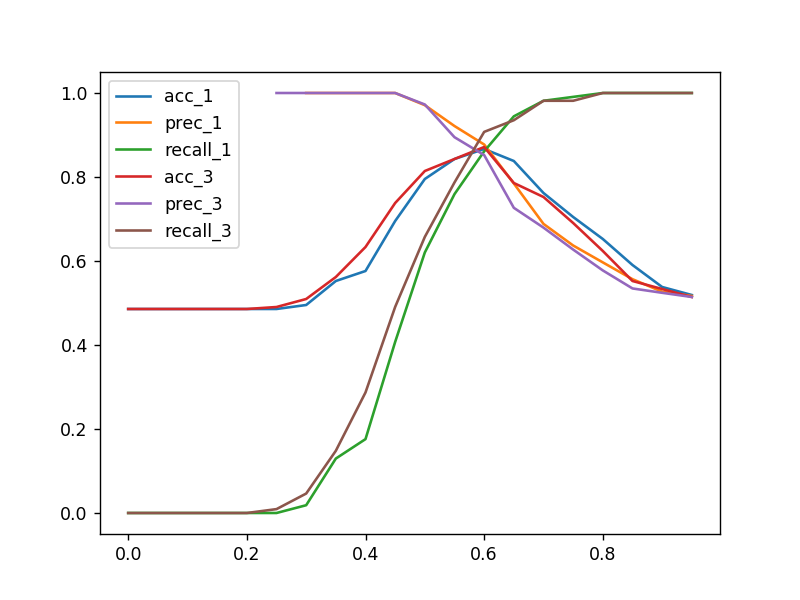

errors: 90


In [17]:
thresholds = range(0,100,5)
presses = []
for name, calc_distance_func in zip(["1","3"], [partial(calc_distance, num_jitters=1), partial(calc_distance, num_jitters=3)]):
    res = test_algo_dist(df=test_df, calc_distance_func=calc_distance_func, thresholds=thresholds)
    pres = print_results(res, thresholds, verbose=0)
    x, *ys = parse_pres(pres)
    lineplot(x, ys, map(lambda x: x+'_'+name, ['acc','prec','recall']))

In [101]:
thresholds = range(0,100,5)
presses = []
for name, calc_distance_func in zip(["1.0","1.5","2.0"], [partial(calc_distance, gamma=1.0), partial(calc_distance, gamma=1.5), partial(calc_distance, gamma=2.0)]):
for name, calc_distance_func in zip(["1","3"], [partial(calc_distance, num_jitters=1), partial(calc_distance, num_jitters=3)]):
    res = test_algo_dist(df=ic_test_df, calc_distance_func=calc_distance_func, thresholds=thresholds)
    pres = print_results(res, thresholds, verbose=0)
    x, *ys = parse_pres(pres)
    lineplot(x, ys, map(lambda x: x+'_'+name, ['acc','prec','recall']))

errors: 96


errors: 96


In [28]:
# thresholds = range(0,100,5)
# presses = []
# for name, calc_distance_func in zip(["cnn","hog"], [partial(calc_distance, bbox_model="cnn"), partial(calc_distance, bbox_model="hog")]):
#     res = test_algo_dist(df=ic_test_df, calc_distance_func=calc_distance_func, thresholds=thresholds)
#     presses.append( print_results(res, thresholds, verbose=0) )

In [24]:
plt.show()

In [27]:
# presses

<IPython.core.display.Javascript object>


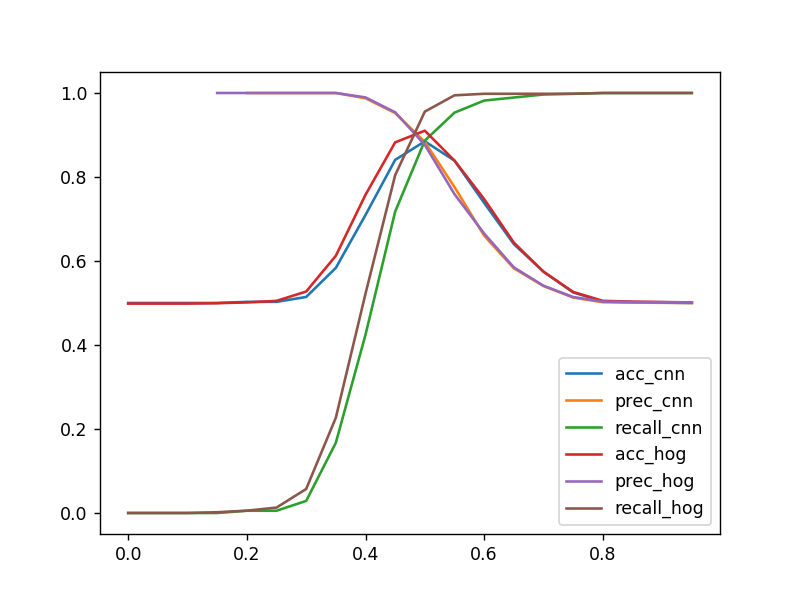

In [30]:
for pres, name in zip(presses, ["cnn", "hog"]):
    x, *ys = parse_pres(pres)
    lineplot(x, ys, map(lambda x: x+'_'+name, ['acc','prec','recall']))

In [40]:
thresholds = range(0,100,5)
presses = []
for name, calc_distance_func in zip(["1.0","1.5","2.0"], [partial(calc_distance, gamma=1.0), partial(calc_distance, gamma=1.5), partial(calc_distance, gamma=2.0)]):
    res = test_algo_dist(df=ic_test_df, calc_distance_func=calc_distance_func, thresholds=thresholds)
    presses.append( print_results(res, thresholds, verbose=0) )

errors: 55


errors: 77


errors: 101


In [44]:
%matplotlib notebook

<IPython.core.display.Javascript object>


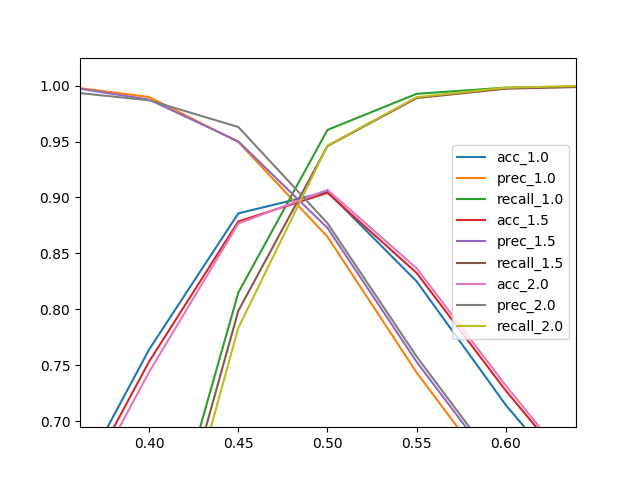

In [45]:
for pres, name in zip(presses, ["1.0","1.5","2.0"]):
    x, *ys = parse_pres(pres)
    lineplot(x, ys, map(lambda x: x+'_'+name, ['acc','prec','recall']))

In [34]:
def find_head_bbox(imA_path, imB_path, bbox_model="hog"):
    known_image = face_recognition.load_image_file(imA_path)
    unknown_image = face_recognition.load_image_file(imB_path)
    kbbox = face_recognition.face_locations(known_image, model=bbox_model)[0]
    ubbox = face_recognition.face_locations(unknown_image, model=bbox_model)[0]
    return kbbox, ubbox

In [37]:
%matplotlib inline

In [ ]:
1

In [14]:
thresholds = range(50,61,5)
res = test_algo(df=ic_test_df, is_same_face_func=is_same_face, thresholds=thresholds)
print_results(res, thresholds)

0.5 errors: 96


0.55 errors: 96


0.6 errors: 96
0.5 [0.88, 0.75, 0.95]
0.55 [0.77, 0.59, 0.99]
0.6 [0.62, 0.47, 0.99]


In [39]:
resize_one_img = lambda x, size: F.interpolate(x[None], size=size, mode='bilinear', align_corners=True)[0]

In [60]:
def show_bbox(im_tensor, bbox, ax, title):
    imageBB = ImageBBox.create(*im_tensor.shape[1:], tensor(bbox)[None], scale=True)
    Image(im_tensor).show(ax=ax, title=title, y=imageBB)

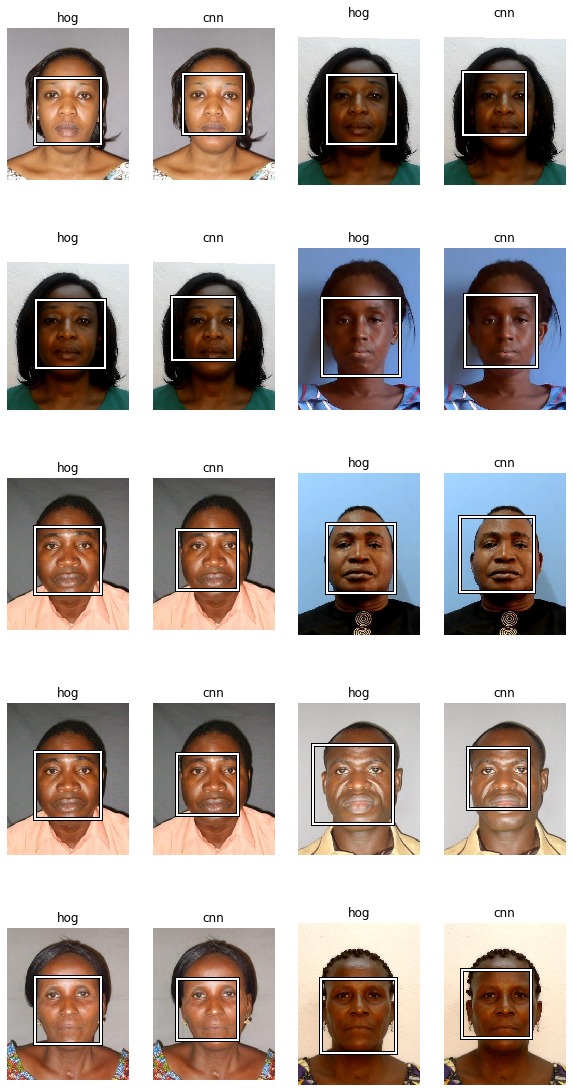

In [67]:
df = ic_test_df
nrows = 5
_, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(10,20))
for i, (a,b,is_same_true) in enumerate(zip(df['imA'], df['imB'], df['is_same'])):
    if i == nrows: break
    abbox, bbbox = find_head_bbox(a, b, bbox_model="hog")
    imA, imB = open_image(a).data, open_image(b).data
    
    show_bbox(imA, abbox, ax[i][0], title="hog")
    show_bbox(imB, bbbox, ax[i][2], title="hog")
    
    abbox, bbbox = find_head_bbox(a, b, bbox_model="cnn")
    
    show_bbox(imA, abbox, ax[i][1], title="cnn")
    show_bbox(imB, bbbox, ax[i][3], title="cnn")

In [55]:
ImageBBox.create??

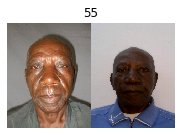

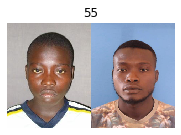

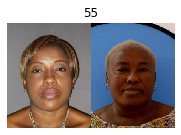

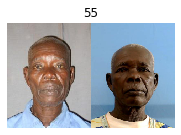

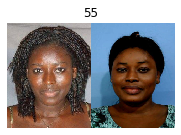

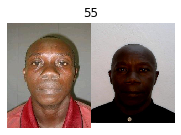

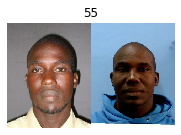

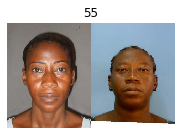

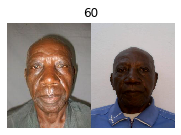

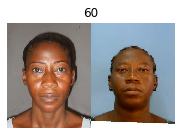

In [27]:
for r,t in list(zip(res, thresholds))[1:]:
    r = list(filter(lambda x: x[0] != 'unk', r))
    r = list(filter(lambda x: x[1] == True, r)) # recall
    incorrect_examples = list(filter(lambda x: x[0]!=x[1], r))
    for _,_,imA,imB in incorrect_examples:
        imA, imB = open_image(imA).data, open_image(imB).data
        imB = resize_one_img(imB, imA.shape[1:])
        imC = torch.cat([imA.data, imB.data], axis=2)
        Image(imC).show(title=str(t))
#         im.show()

# Pytorch facenet

In [331]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import numpy as np
import pandas as pd
import os

class ImagesWithPath(datasets.ImageFolder):
    def __getitem__(self, index):
        original_tuple = super().__getitem__(index)
        path = self.imgs[index][0]
        return (original_tuple + (path,))

workers = 0 if os.name == 'nt' else 4

mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

def collate_fn(x):
    return x[0]

dataset = ImagesWithPath('/data/faces/temp/')
dataset.idx_to_class = {i:c for c, i in dataset.class_to_idx.items()}
loader = DataLoader(dataset, collate_fn=collate_fn, num_workers=workers)

Running on device: cuda:0


In [332]:
aligned, names, paths = [], [], []
for x, y, path in progress_bar(loader):
    x_aligned, prob = mtcnn(x, return_prob=True)
    if x_aligned is not None:
#         print('Face detected with probability: {:8f}'.format(prob))
        aligned.append(x_aligned)
        names.append(dataset.idx_to_class[y])
        paths.append(path)
aligned = torch.stack(aligned).to(device)
aligned.shape

torch.Size([2226, 3, 160, 160])

In [315]:
# mtcnn = MTCNN(
#     image_size=160, margin=0, min_face_size=20,
#     thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=False,
#     device=device
# )
# save_dir = Path('../data/recognition/ivorycoast_2k_cropped/')
# for x, y, path in progress_bar(loader):
#     x_aligned, prob = mtcnn(x, return_prob=True)
#     if x_aligned is not None:
#         Image(x_aligned.double()/255).save(save_dir/Path(path).name)

In [333]:
embeddings = []
for batch in progress_bar(torch.chunk(aligned, 400, dim=0)):
    embeddings.append( resnet(batch).detach().cpu() )
embeddings = torch.stack(embeddings, dim=0).view(-1,512)

In [334]:
fn2embedding = {Path(path).name:emb  for path, emb in zip(paths, embeddings)}

In [335]:
list(fn2embedding.keys())[0]

'1000651New.jpg'

In [336]:
# nt_test_df

In [357]:
df = nt_test_df
distances = []
for a,b,is_same_true in progress_bar(list(zip(df['imA'], df['imB'], df['is_same']))):
    a,b = map(lambda x: Path(x).name, [a,b])
    a_emb, b_emb = map(lambda x: fn2embedding[x], [a,b])
    dist = (a_emb - b_emb).norm()
#     dist = cosin_metric(a_emb, b_emb)
    distances.append(dist)

In [358]:
distances = np.array(distances) / np.max(distances)
# distances = 1 - distances

In [359]:
thresholds = range(0,100,5)
precalculated_distances = create_dist_generator(distances)
res = test_algo_dist(df=nt_test_df, calc_distance_func=precalculated_distances, thresholds=thresholds)
pres_facenet = print_results(res, thresholds, verbose=0)

errors: 0


In [350]:
# precalculated_distances = create_dist_generator(nt_test_df['nt_result'])
# res2 = test_algo_dist(df=nt_test_df, calc_distance_func=precalculated_distances, thresholds=thresholds)
# pres2 = print_results(res2, thresholds, verbose=0)

<IPython.core.display.Javascript object>


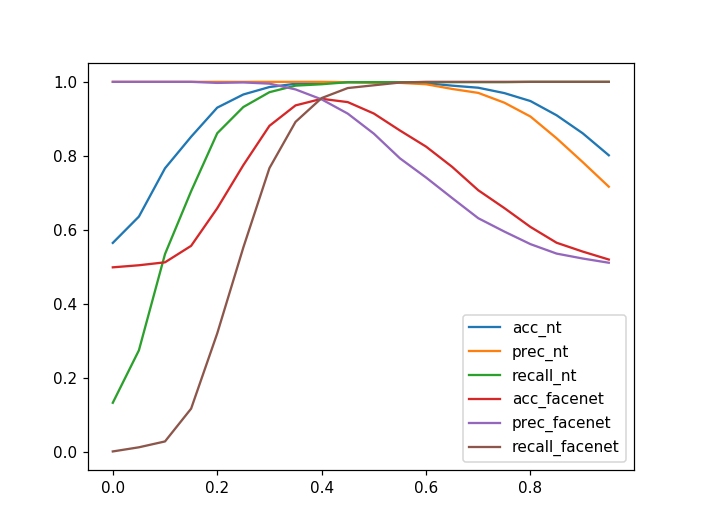

In [351]:
%matplotlib notebook
plt.show()
for p, name in zip([pres_nt,pres_facenet],['nt','facenet']):
    x, *ys = parse_pres(p)
    lineplot(x, ys, map(lambda x: x+'_'+name, ['acc','prec','recall']))

<IPython.core.display.Javascript object>


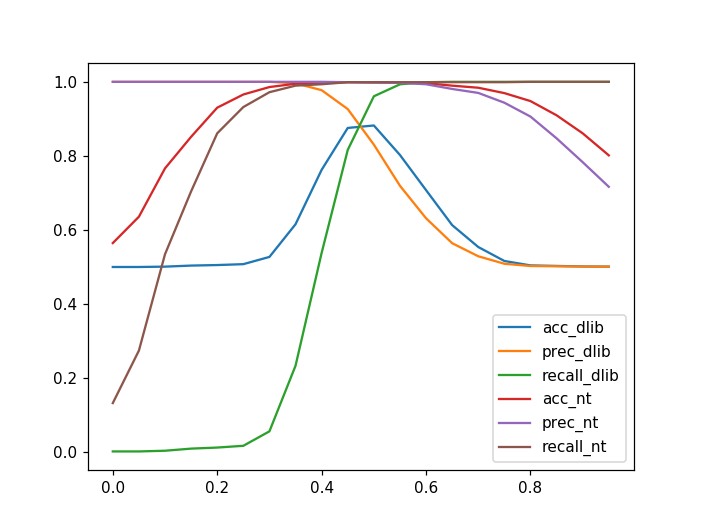

In [301]:
%matplotlib notebook
plt.show()
for p, name in zip([pres_dlib,pres_nt],['dlib','nt']):
    x, *ys = parse_pres(p)
    lineplot(x, ys, map(lambda x: x+'_'+name, ['acc','prec','recall']))

<IPython.core.display.Javascript object>


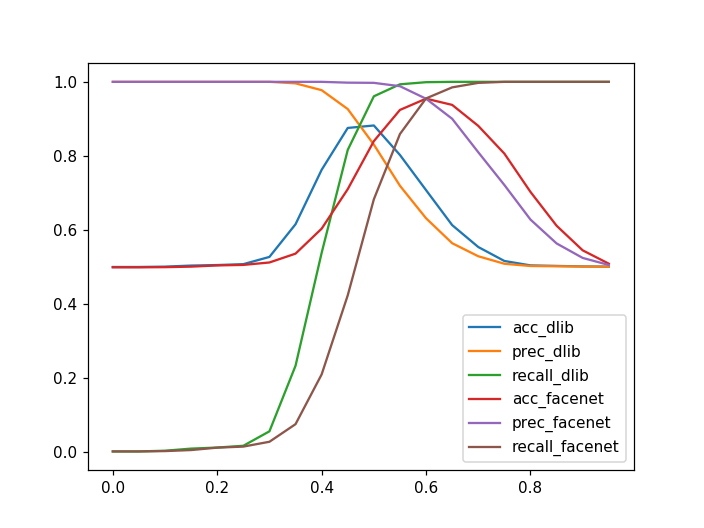

In [341]:
%matplotlib notebook
plt.show()
for p, name in zip([pres_dlib,pres_facenet],['dlib','facenet']):
    x, *ys = parse_pres(p)
    lineplot(x, ys, map(lambda x: x+'_'+name, ['acc','prec','recall']))

In [119]:
precalculated_distances = create_dist_generator(distances)
res = test_algo_dist(df=nt_test_df, calc_distance_func=precalculated_distances, thresholds=thresholds)
pres_casia = print_results(res, thresholds, verbose=0)

errors: 0


<IPython.core.display.Javascript object>


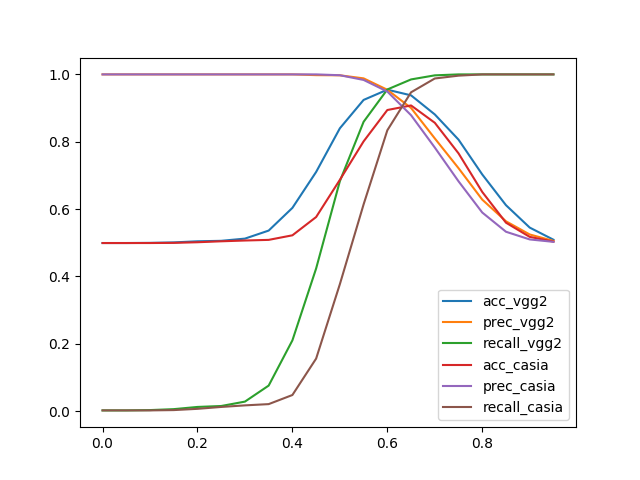

In [195]:
%matplotlib notebook
plt.show()
for p, name in zip([pres_facenet,pres_casia],['vgg2','casia']):
    x, *ys = parse_pres(p)
    lineplot(x, ys, map(lambda x: x+'_'+name, ['acc','prec','recall']))

# IsightFace

In [362]:
import pickle

def read_dict(path):
    with open(path, 'rb') as handle:
        unserialized_data = pickle.load(handle)
    return unserialized_data

fn2emb = read_dict('../data/recognition/ic2k_insightface_fn2emb.pkl')

In [401]:
def cosin_metric(x1, x2):
    x1, x2 = map(lambda x: x.numpy(), [x1, x2])
    return np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

In [406]:
df = nt_test_df
distances = []
for a,b,is_same_true in progress_bar(list(zip(df['imA'], df['imB'], df['is_same']))):
    a,b = map(lambda x: Path(x).name, [a,b])
    a_emb, b_emb = map(lambda x: tensor(fn2emb[x]), [a,b])
#     dist = (a_emb - b_emb).norm()
    dist = cosin_metric(a_emb, b_emb)
    distances.append(dist)
distances = torch.tensor(distances)

In [407]:
distances = distances - distances.min()
distances = distances / distances.max()
distances = 1 - distances

In [408]:
thresholds = range(0,100,5)
precalculated_distances = create_dist_generator(distances)
res = test_algo_dist(df=nt_test_df, calc_distance_func=precalculated_distances, thresholds=thresholds)
pres_insightface = print_results(res, thresholds, verbose=0)

errors: 0


<IPython.core.display.Javascript object>


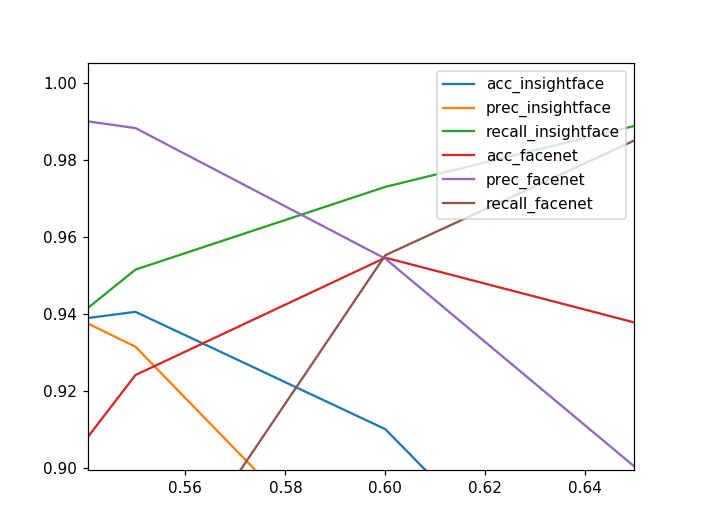

In [409]:
%matplotlib notebook
plt.show()
for p, name in zip([pres_insightface,pres_facenet],['insightface','facenet']):
    x, *ys = parse_pres(p)
    lineplot(x, ys, map(lambda x: x+'_'+name, ['acc','prec','recall']))